# Práctica de Evaluación Módulo 4 - Aprendizaje Automático

## Dossier

### 1. Carga de los datos

El conjunto de datos utilizado para este ejercicio es el dataset de evaluación de automóviles disponible en el repositorio UCI Machine Learning Repository. Este dataset contiene características relacionadas con las especificaciones de automóviles, y se ha utilizado para construir un modelo supervisado de clasificación.

- **Webpage dataset**: [Car Evaluation](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)
- **URL del dataset**: [Car Evaluation Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data)
- **URL de la descripción del dataset**: [Car Evaluation Dataset descripción](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names)
- **Columnas**:
    - `buying`: precio de compra
    - `maint`: costo de mantenimiento
    - `doors`: número de puertas
    - `persons`: capacidad de pasajeros
    - `lug_boot`: tamaño del maletero
    - `safety`: nivel de seguridad
    - `class`: evaluación del automóvil (target)

La carga de los datos se realiza utilizando la librería `pandas`, que permite una rápida visualización y descripción del dataset. Se observó que los datos no contienen valores nulos.

### 2. Análisis Exploratorio de Datos

Para explorar los datos, se realizó un análisis de la distribución de cada una de las variables categóricas. Esto incluyó:

- Distribución de valores en cada variable (`buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety`, `class`).
- Se observó que las características están balanceadas y no presentan un sesgo significativo que requiera mayor ajuste.
- En el caso de la variable objetivo `class`, se observó que las clases están desbalanceadas, con la clase `unacc` siendo la más común, seguida de `acc`, `good` y `vgood`. Por lo tanto, decidí aplicar técnicas de balanceo de clases para mejorar el rendimiento de los modelos de clasificación.
- A continuación, se generaron gráficos para observar la distribución del target `class` y una matriz de correlación entre las variables ordinales tras su transformación, lo que nos permite entender mejor las relaciones entre ellas.
- Cabe destacar que en las transformaciones realizadas, se mapearon los valores ordinales de las características a números enteros, esto mostró una mayor correlación entre las variables ordinales y el target `class`, al igual que un mejor resultado en los modelos de clasificación.

### 3. Objetivos a tratar en el dataset

El objetivo principal de este análisis es predecir la evaluación final del automóvil (`class`), que tiene cuatro posibles valores: `unacc`, `acc`, `good`, y `vgood`. Esta predicción es útil para clasificar automáticamente los automóviles en función de diversas características, facilitando la toma de decisiones para consumidores y empresas.

### 4. Preprocesado de los datos

Dado que el dataset contiene variables categóricas, fue necesario mapear los valores categóricos a numéricos de forma adecuada para poder entrenar modelos de clasificación. Se aplicaron las siguientes transformaciones:

- Se mapearon los valores ordinales de las columnas `buying`, `maint`, `lug_boot` y `safety` a números enteros.
- Para las columnas `doors` y `persons`, los valores `5more` y `more` se reemplazaron por 5 para preservar el valor ordinal de la variable.
- La variable objetivo `class` se mapeó a valores numéricos para poder entrenar los modelos de clasificación.

No fue necesario eliminar filas o manejar valores nulos, ya que el dataset no contiene valores faltantes.

### 5. Modelo de Datos y Algoritmos Utilizados

Se seleccionaron varios modelos supervisados para realizar la clasificación. Los modelos evaluados fueron:

- Random Forest
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Decision Tree
- Red Neuronal Multicapa

Para cada modelo, se utilizó validación cruzada con 5 "folds" para obtener una estimación robusta de la precisión. Además, el dataset fue balanceado utilizando la técnica de sobremuestreo SMOTE, dado que las clases del target estaban bastante desbalanceadas.

### 6. Evaluación y Métricas

Se compararon las precisiones de los modelos utilizando la métrica de "accuracy" (precisión). El modelo de Decision Tree obtuvo el mejor rendimiento con una precisión media de 0.973. Tras seleccionar este modelo, se realizó una búsqueda de hiperparámetros utilizando GridSearchCV para mejorar su rendimiento.

#### Métricas obtenidas para el modelo final (Decision Tree):
- **Accuracy** 
 - **Validación cruzada**: 0.982
 - **Test set**: 0.989
- **Reporte de clasificación**: Incluye precisión, "recall", F1-score, y soporte para cada clase.
- **Matriz de confusión**: Se generó una matriz de confusión para evaluar los errores de clasificación.
- **Detección de overfitting**: Se evaluó la posibilidad de overfitting mediante la comparación de las precisiones en el conjunto de entrenamiento y test, donde en el entrenamiento se usó validación cruzada y el conjunto de prueba (30%) no fue utilizado para validación. Se encontró que el modelo presenta aproximádamente un 0.003 de diferencia entre ambos conjuntos, lo que indica que el modelo está ligeramente sobreajustado, pero no de forma significativa para ser considerado un problema.
- **Importancia de las características del modelo**: Finalmente, se analizó la importancia de las características del modelo, identificando cuáles contribuyen más a la predicción final.

### 7. Guardado del Modelo

El modelo final se guardó utilizando la librería `joblib` para poder ser reutilizado en futuros análisis.

Como parte del proceso de guardado, también se exportó la función de preprocesamiento utilizada para transformar los datos de entrada en un formato adecuado para el modelo.

### 8. Conclusiones

En resumen, se ha construido un modelo de clasificación de automóviles utilizando el dataset de evaluación de automóviles. Se aplicaron técnicas de preprocesamiento de datos, balanceo de clases y selección de modelos para obtener un modelo de clasificación robusto. El modelo final, basado en un Descision Tree, obtuvo una precisión del 98.9% en el conjunto de prueba, lo que indica que es capaz de predecir con precisión la evaluación de los automóviles.


## Notebook de Código

### Instalación de librerías necesarias

In [1]:
! pip install pandas matplotlib scikit-learn imblearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Importación de librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier    
import numpy as np
from imblearn.over_sampling import SMOTE    



## Carga de datos

In [3]:
# Cargamos el dataset desde una fuente online
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
# definimos los nombres de las columnas
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=column_names)

# Vistazo inicial a los datos
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


## Análisis exploratorio de datos y creación de características

In [4]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [5]:
# Contamos la las distribuciones de las variables
print(df['class'].value_counts())
print(df['maint'].value_counts())
print(df['doors'].value_counts())
print(df['persons'].value_counts())
print(df['lug_boot'].value_counts())
print(df['safety'].value_counts())
print(df['buying'].value_counts())


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


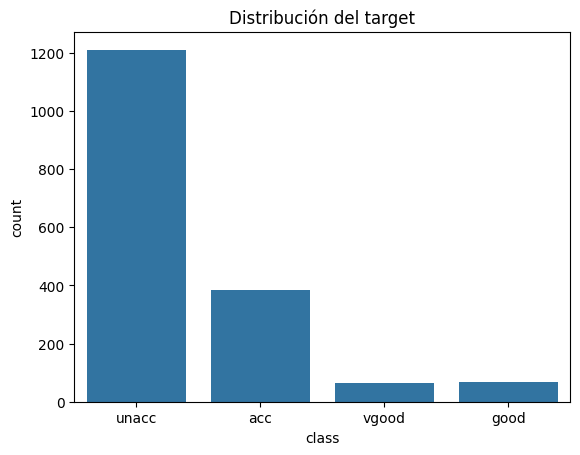

In [6]:
# Podemos observar que no hay datos faltantes, pero en en el target class hay 4 clases desbalanceadas. 
# Distribución de las clases:
sns.countplot(x='class', data=df)
plt.title('Distribución del target')
plt.show()

## Preprocesado de datos

In [7]:

def preprocess_data(df):
    """
    Preprocesamiento del dataset de evaluación de automóviles mediante el mapeo de valores categóricos a valores numéricos.

    Parámetros:
    df (pd.DataFrame): El dataframe original con valores categóricos.

    Retorna:
    pd.DataFrame: El dataframe preprocesado con valores numéricos.
    """
    # Clonar el dataframe para no modificar el original
    df_prep = df.copy()

    # Inicialmente estuve probando con LabelEncoder para las variables categóricas, pero al ser variables ordinales,
    # decidí hacer un mapeo de los valores categóricos a valores numéricos, para mantener el orden ordinal de las variables. 

    # Mapea el valor ordinal de las variables categóricas
    df_prep['buying'] = df_prep['buying'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
    df_prep['maint'] = df_prep['maint'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
    df_prep['lug_boot'] = df_prep['lug_boot'].map({'big': 3, 'med': 2, 'small': 1})
    df_prep['safety'] = df_prep['safety'].map({'high': 3, 'med': 2, 'low': 1})
    df_prep['class'] = df_prep['class'].map({'vgood': 4, 'good': 3, 'acc': 2, 'unacc': 1})
    # También he observado que tanto las puertas como las personas tiene un valor 'more', 
    # el cual hace perder el valor ordinal de la variable, por lo que lo cambiaré por un valor numérico, poniendo 5.
    df_prep['doors'] = df_prep['doors'].replace('5more', 5)
    df_prep['persons'] = df_prep['persons'].replace('more', 5)
    df_prep['doors'] = df_prep['doors'].astype(int)
    df_prep['persons'] = df_prep['persons'].astype(int)


    # opcionálmente, al ser variables ordinales y estar en un rango, se pueden escalar los valores de las variables, usando MinMaxScaler por ejemplo.
    # Por ahora lo comentaré, ya que he probado el resultado final, y el resultado tiende a ser 100%, lo cual puede ser un indicio de overfitting. 
    # Da 1 de accuracy tanto con los datos de entrenamiento como en los de prueba, 
    # y en la validación cruzada da 0.993, por lo que debiera estar bien y no debiera haber overfitting. 
    # No quiero complicar de más el ejercicio, necesitaría más datos para probar si hay overfitting.    
    # from sklearn.preprocessing import MinMaxScaler
    # scaler = MinMaxScaler()
    # df_prep[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']] = scaler.fit_transform(df_prep[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])
    
    return df_prep

# Uso de la función
df_prep = preprocess_data(df)

# Vistazo a los datos transformados
print(df_prep.head())
print(df_prep.info())

   buying  maint  doors  persons  lug_boot  safety  class
0       4      4      2        2         1       1      1
1       4      4      2        2         1       2      1
2       4      4      2        2         1       3      1
3       4      4      2        2         2       1      1
4       4      4      2        2         2       2      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB
None


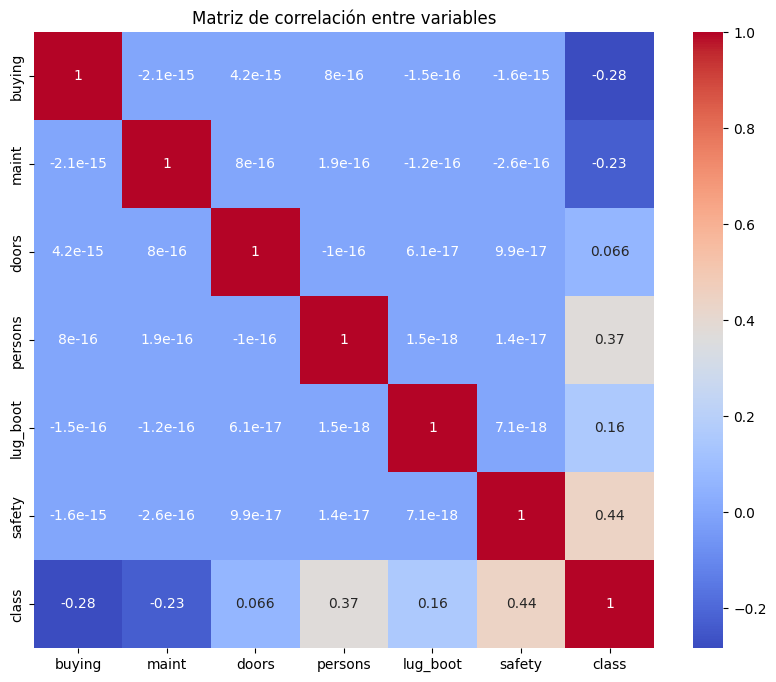

In [8]:
# Revisamos las correlaciones entre variables categóricas
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_prep.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables')
plt.show()

## Modelado y evaluación

In [9]:
# Dividimos los datos en variables predictoras (X) y la variable objetivo (y)
X = df_prep.drop(columns='class')
y = df_prep['class']

In [10]:
# El target class se encuentra desbalanceado, por lo que se procede a balancear las clases con smote

# Instanciamos el objeto SMOTE
smote = SMOTE(random_state=42)
# Aplicamos el método fit_resample a los datos
X, y = smote.fit_resample(X, y)


### Exploración de algoritmos

Random Forest: mean 0.9634297520661157  std 0.015092547411363356 max 0.981404958677686  min 0.9400826446280992
KNN: mean 0.9047520661157025  std 0.022121915395577146 max 0.9318181818181818  min 0.871900826446281
SVM: mean 0.8913223140495867  std 0.027123621957808323 max 0.9163223140495868  min 0.8429752066115702
Decision Tree: mean 0.9733471074380166  std 0.013024725216921058 max 0.9896694214876033  min 0.9555785123966942
Red Neuronal: mean 0.9464876033057852  std 0.025957518635602344 max 0.9741735537190083  min 0.8987603305785123


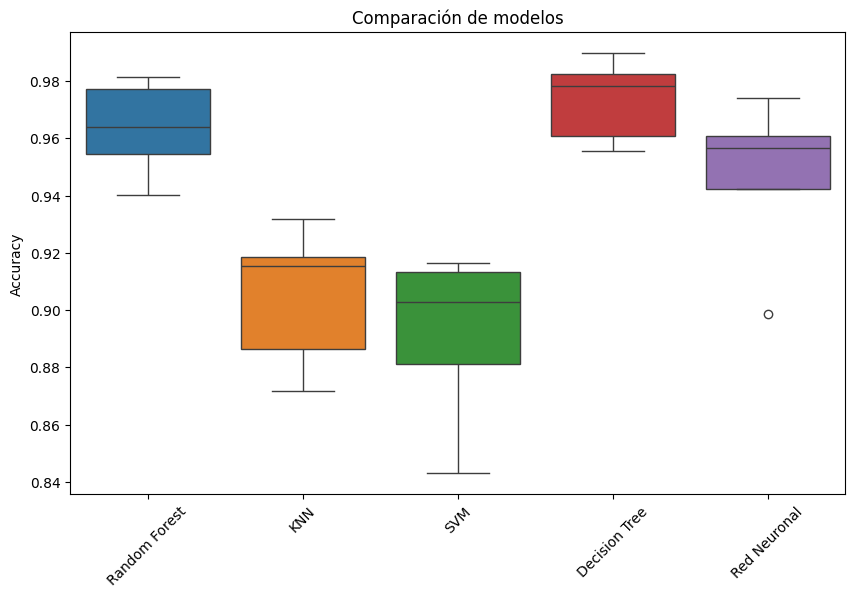

In [11]:

def evaluate_model(model, X, y):
    # Evaluación del modelo
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores

# Modelos a evaluar
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Red Neuronal': MLPClassifier(
        hidden_layer_sizes=(100, 100, 100), 
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42, 
        early_stopping=True
        )
}

# Evaluación de los modelos
results = {}
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results[name] = scores

# Resultados
for name, scores in results.items():
    print(f'{name}: mean {np.mean(scores)}  std {np.std(scores)} max {np.max(scores)}  min {np.min(scores)}')

# Gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(results))
plt.title('Comparación de modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()



### Mejora del modelo

In [12]:
# Podemos ver que el modelo Decision Tree es el que mejor se comporta, con un accuracy de 0.973
# Por lo que lo seleccionaremos como el modelo final

# Utilizamos GridSearchCV para encontrar los mejores hiperparámetros del modelo
from sklearn.model_selection import GridSearchCV

# Definimos los hiperparámetros a evaluar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Instanciamos el modelo
model = DecisionTreeClassifier(random_state=42)

# Instanciamos GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Realizamos la búsqueda de hiperparámetros
# grid_search.fit(X, y)
# Dividimos los datos en conjuntos de entrenamiento y prueba final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Realizamos la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:",grid_search.best_params_)
print("Mejor puntuación con validation set:", grid_search.best_score_)



Mejores hiperparámetros encontrados: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor puntuación con validation set: 0.9824372759856631


### Evaluación del modelo final

In [13]:
import numpy as np

# Realizamos predicciones sobre el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_classification_report = classification_report(y_test, y_pred)

# Evaluamos el rendimiento del modelo
print("Mejor puntuación con test set:", test_accuracy)
print("Reporte de clasificación:\n", test_classification_report)



Mejor puntuación con test set: 0.9896694214876033
Reporte de clasificación:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       0.98      0.99      0.99       242
           3       0.98      0.98      0.98       242
           4       1.00      0.99      0.99       242

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968



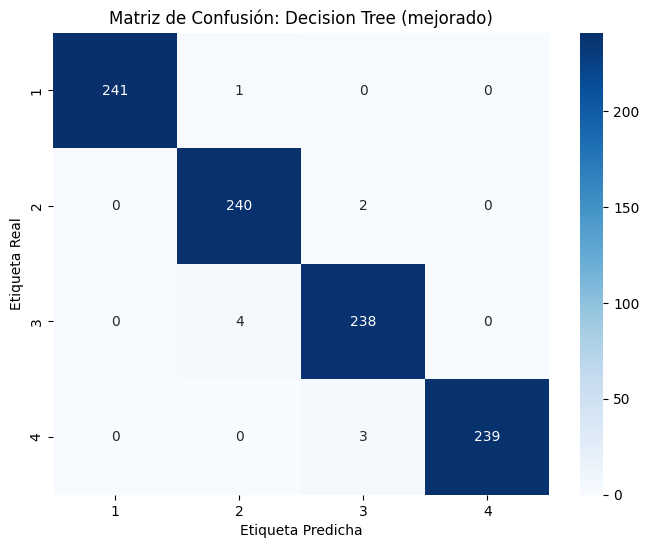

In [14]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.title(f'Matriz de Confusión: {model_name}')
    plt.show()
plot_confusion_matrix(y_test, y_pred, 'Decision Tree (mejorado)')

In [15]:
# Evaluamos el rendimiento del modelo en el conjunto de entrenamiento
y_train_pred = grid_search.best_estimator_.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Mostramos los resultados
print(f"Rendimiento en el conjunto de entrenamiento: {train_accuracy}")
print(f"Rendimiento en el conjunto de prueba: {test_accuracy}")

# Comparamos los resultados
if train_accuracy > test_accuracy:
    if train_accuracy - test_accuracy < 0.005:
        print("El modelo está ligeramente sobreajustado (overfitting), pero la diferencia es menor a 0.005 (0.5%).")
        # Considerando que el modelo ha sido mejorado y que hemos apartado el 30% de los datos para test (nunca vistos), se puede considerar aceptable
    else:
        print("El modelo está sobreajustado (overfitting).")
else:
    print("El modelo no está sobreajustado (no overfitting).")

Rendimiento en el conjunto de entrenamiento: 0.9927685950413223
Rendimiento en el conjunto de prueba: 0.9896694214876033
El modelo está ligeramente sobreajustado (overfitting), pero la diferencia es menor a 0.005 (0.5%).


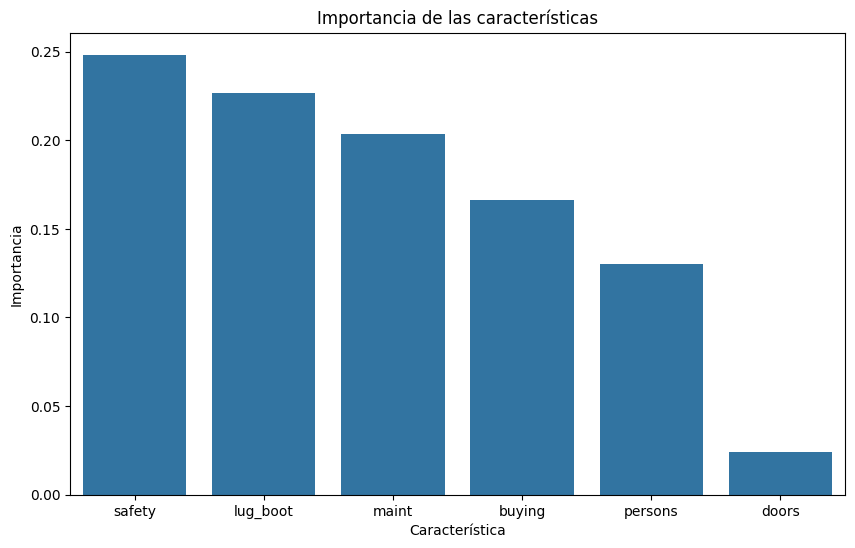

In [16]:
# Gráfico de importancia de las características
importances = grid_search.best_estimator_.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=features[indices], y=importances[indices])
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()


## Guardado del modelo

In [17]:

# Guardamos el modelo en un archivo pickle
import joblib

joblib.dump(grid_search.best_estimator_, 'model.pkl')


['model.pkl']

In [18]:
# También guardamos la función de preprocesamiento
joblib.dump(preprocess_data, 'preprocess_data.pkl')


['preprocess_data.pkl']